In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import normalize
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from time import time

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", delimiter=";")
df.columns = ['age', 'job', 'marital', 'education', 'credit', 'housing', 'loan','contact', 'month', 'day_of_week',
              'duration', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx',
              'euribor3m', 'nr.employed', 'subscribed']

In [4]:
df

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
# cek Null
df.isnull().sum()

age               0
job               0
marital           0
education         0
credit            0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

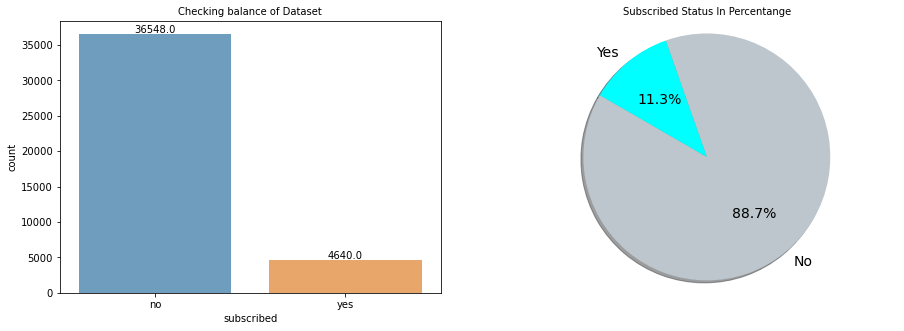

In [6]:
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Checking balance of Dataset', fontsize=10)
s = sns.countplot(x="subscribed", data=df, alpha=0.7)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')


ax = plt.subplot(122)
mush_classpie = df['subscribed'].value_counts()
mush_size = mush_classpie.values.tolist()
mush_types = mush_classpie.axes[0].tolist()
mush_labels = 'No', 'Yes'
colors = ['#BCC6CC', '#00FFFF']
plt.title('Subscribed Status In Percentange', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, labels=mush_labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')  
plt.show()

Text(0.5, 0, '---Job---')

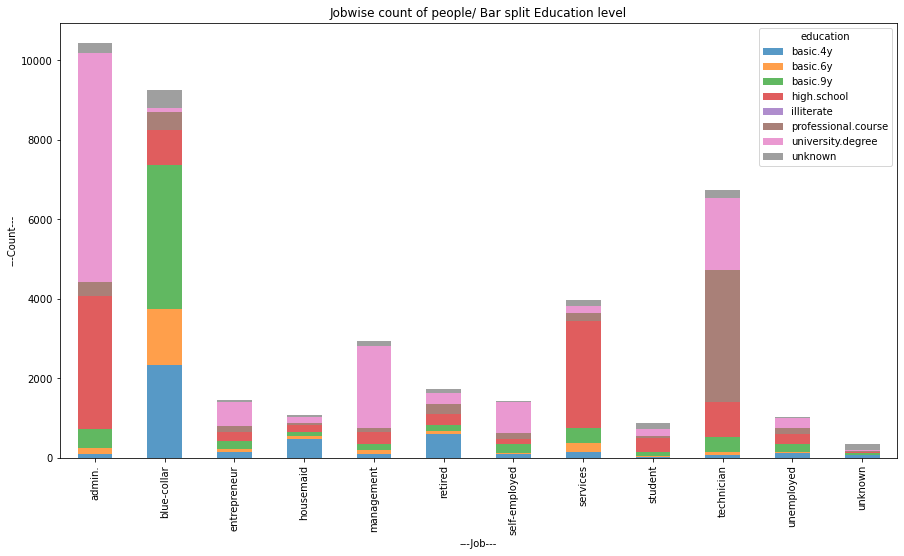

In [7]:
df_pivot = pd.pivot_table(df,columns='education', index='job', aggfunc='count',values='age')
df_pivot.plot(kind='bar',stacked=True, figsize=(15,8), alpha=0.75)
plt.title('Jobwise count of people/ Bar split Education level')
plt.ylabel('---Count---')
plt.xlabel('---Job---')

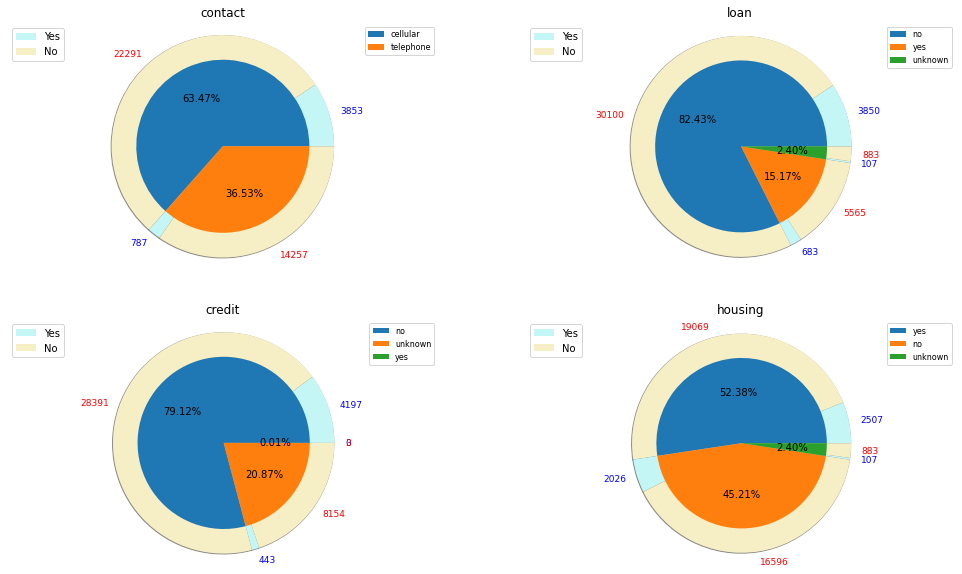

In [8]:
f, axes = plt.subplots(4,1, figsize=(17,10), sharey = True) 
num_col = ['contact', 'loan', 'credit', 'housing']

for j,col in enumerate(num_col):
    cols = df[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []   
    for pop in pop_types: 
        size = len(df[df[col] == pop].index)
        edibles = len(df[(df[col] == pop) & (df['subscribed'] == 'yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(2,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#C4F6F5','#F6EEC4'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

In [9]:
def absolute_value(val,month):
    a = round(val*sum(df[df['month']==month].subscribed.value_counts())/100,0)
    return a

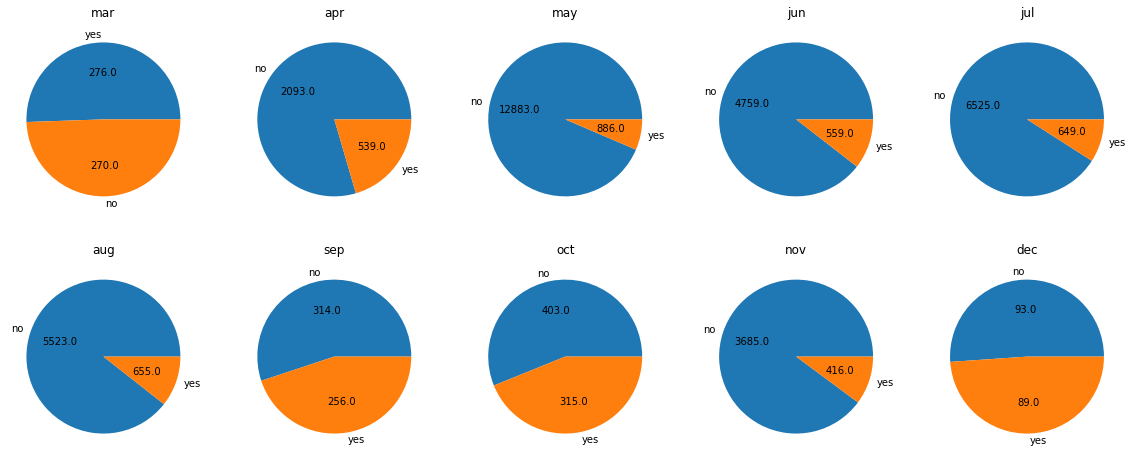

In [10]:


fig, axs = plt.subplots(2,5,figsize=(20,8))
plot_dict=dict(zip(range(0,10),[axs[0,0],axs[0,1],axs[0,2],axs[0,3],axs[0,4],
                     axs[1,0],axs[1,1], axs[1,2], axs[1,3], axs[1,4]]))

#enumerate returns tuple of month and a number(idx)
for idx, month in enumerate(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']):
    #gets axes from dict and plots on it
    plot_dict.get(idx).pie(df[df['month']==month].subscribed.value_counts(),
             labels=df[df['month']==month].subscribed.value_counts().index, autopct=lambda val: absolute_value(val,month))
    plot_dict.get(idx).set_title(month)



# Label Encoding

In [11]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   credit       41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  subscribed   41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [12]:
dict_job = {
    "job":{
        "housemaid":1,
        "unemployed":0,
        "entrepreneur":4,
        "blue-collar":1,
        "services":3,
        "admin.":2,
        "technician":2,
        "retired":1,
        "management":4,
        "self-employed":3,
        "unknown":1,
        "student":0.5
    }}
dict_education = {
    "education":{
        "basic.4y":1,
        "basic.6y":1,
        "basic.9y":1,
        "high.school":1,
        "professional.course":2,
        "university.degree":2,
        "illiterate":0.9,
        "unknown":0.9
    }}

dict_poutcome = {
    "poutcome":{
        "nonexistent":0,
        "failure":0,
        "success":1
    }}
dict_y = {
    "subscribed":{
        "no":0,
        "yes":1
    }}

In [13]:
for i in [dict_poutcome,dict_y, dict_education, dict_job]:
    df.replace(i,inplace=True)

In [14]:
df.tail()

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
41183,73,1.0,married,2.0,no,yes,no,cellular,nov,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1.0,married,2.0,no,no,no,cellular,nov,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,1.0,married,2.0,no,yes,no,cellular,nov,fri,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,2.0,married,2.0,no,no,no,cellular,nov,fri,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,1.0,married,2.0,no,yes,no,cellular,nov,fri,...,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [15]:
#Encoding rest of the un ordinal categorical variable 
lc_X1 = LabelEncoder()
lst = ['marital','credit','housing','loan']

for i in lst:
    df[i] = lc_X1.fit_transform(df[i])

In [16]:
df_1 = pd.get_dummies(df,
                      columns=['marital','credit','housing','loan'],
                      drop_first=True)
df_1.head()

,age,job,education,contact,month,day_of_week,duration,campaign,pdays,previous,...,subscribed,marital_1,marital_2,marital_3,credit_1,credit_2,housing_1,housing_2,loan_1,loan_2
0,56,1.0,1.0,telephone,may,mon,261,1,999,0,...,0,1,0,0,0,0,0,0,0,0
1,57,3.0,1.0,telephone,may,mon,149,1,999,0,...,0,1,0,0,1,0,0,0,0,0
2,37,3.0,1.0,telephone,may,mon,226,1,999,0,...,0,1,0,0,0,0,0,1,0,0
3,40,2.0,1.0,telephone,may,mon,151,1,999,0,...,0,1,0,0,0,0,0,0,0,0
4,56,3.0,1.0,telephone,may,mon,307,1,999,0,...,0,1,0,0,0,0,0,0,0,1


# Cek Korelasi

In [17]:
corr = df_1.corr()
print(corr['subscribed'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
credit_1         -0.099293
campaign         -0.066357
marital_1        -0.043398
job              -0.027963
loan_2           -0.004466
credit_2         -0.003041
loan_1           -0.002270
housing_1        -0.002270
marital_3         0.005211
housing_2         0.011743
age               0.030399
education         0.045916
marital_2         0.054133
cons.conf.idx     0.054878
previous          0.230181
poutcome          0.316269
duration          0.405274
subscribed        1.000000
Name: subscribed, dtype: float64


In [18]:
# hapus features yang sedikit berkorelasi
df_1.drop(columns=[
    'nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','contact','month','campaign', 'day_of_week'
    ], axis=0, inplace=True)

<ipython-input-19-5929be3c9ca4>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


Text(0.5, 1.0, 'Correlation')

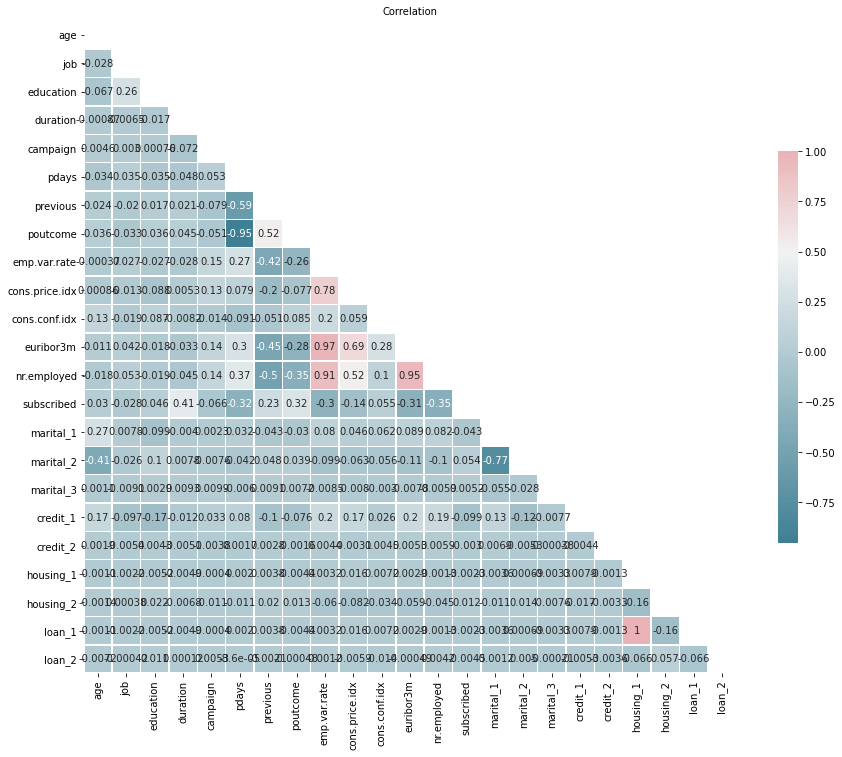

In [19]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmax=1, 
            center=0.5, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .6},
            annot=True
           )
plt.title("Correlation", fontsize =10)

# Meng-assign Variabel

In [20]:
X = df_1.drop(columns = 'subscribed',axis=1).values
y = df_1['subscribed'].values 

# Splitting Data n Scaling

In [21]:
#split training - test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [22]:
df_1['subscribed'].value_counts()

0    36548
1     4640
Name: subscribed, dtype: int64

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Printing Results

In [24]:
def print_scores(model, labels, pred):
    # Confusion matrix
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)    
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    
    cm = confusion_matrix(labels, pred)
    df = pd.DataFrame(cm)
    
    labels = [f"TP: {df[0][0]} ",f"TN: {df[1][1]} ",f"FP: {df[1][0]} ",f"FN: {df[0][1]} "]
    labels = np.asarray(labels).reshape(2,2)
    
    f, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax)    
    print(f"{model}:: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1_score: {f1}")

In [25]:
# cross-validation results
def print_cv_result(results):
    print(f"Best Params : {results.best_params_}\n")
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')

LGR:: Accuracy: 0.901, Precision: 0.664, Recall: 0.309, f1_score: 0.421


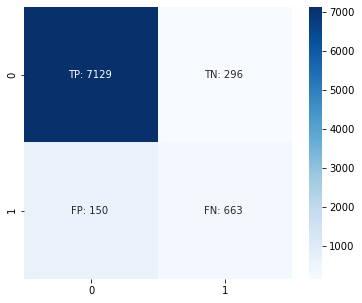

In [26]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print_scores("LGR", y_test, y_pred_lgr)

KNN:: Accuracy: 0.896, Precision: 0.59, Recall: 0.362, f1_score: 0.449


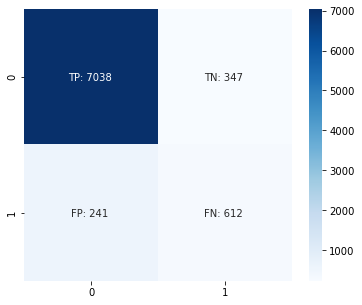

In [27]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, y_train)
y_pred_knn = kNN.predict(X_test)
print_scores("KNN", y_test, y_pred_knn)

SVM Time:76800.38
SVM:: Accuracy: 0.901, Precision: 0.671, Recall: 0.293, f1_score: 0.408


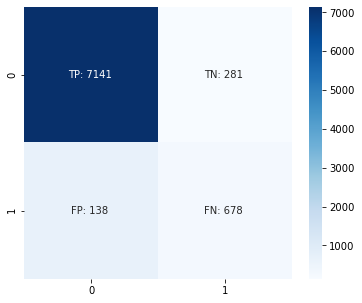

In [28]:
start = time()
svc = SVC(kernel = "rbf", C=10)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
end = time()
print(f"SVM Time:{round((end - start), 5) * 1000}")
print_scores("SVM", y_test, y_pred_svm)

Decision Tree:: Accuracy: 0.887, Precision: 0.516, Recall: 0.508, f1_score: 0.512


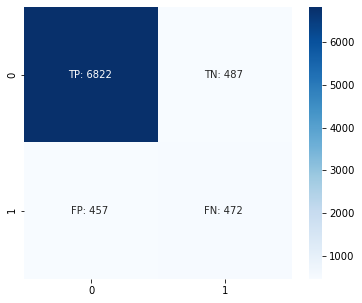

In [29]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt=dt.predict(X_test)
print_scores("Decision Tree", y_test, y_pred_dt)

Random Forest:: Accuracy: 0.906, Precision: 0.642, Recall: 0.44, f1_score: 0.522


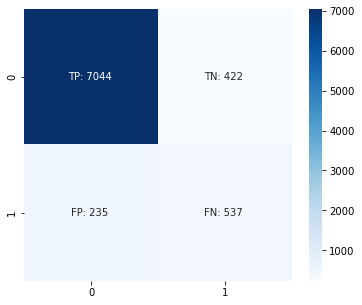

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
print_scores("Random Forest", y_test, y_pred_rf)

C:\Users\sarah\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes:: Accuracy: 0.884, Precision: 0.0, Recall: 0.0, f1_score: 0.0


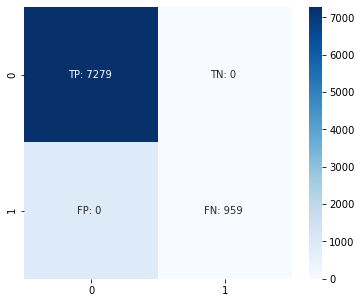

In [31]:
# NAIVE Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print_scores("Naive Bayes", y_test, y_pred_nb)